In [1]:
!pip install opencv-python mediapipe sklearn matplotlib

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.8.0


In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [5]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [7]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [8]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [9]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('HAPPY HANDS', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
draw_landmarks(frame, results)

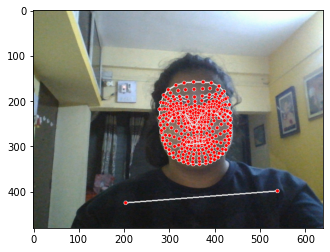

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 0.5550921 ,  0.53637415, -1.46679413, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 0.5550921 ,  0.53637415, -1.46679413, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [23]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [24]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('HAPPY HANDS', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
    cap.release()
    cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num, label in enumerate(actions)}

In [27]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [28]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [29]:
np.array(sequences).shape

(90, 30, 1662)

In [30]:
np.array(labels).shape

(90,)

In [31]:
X = np.array(sequences)

In [32]:
X.shape

(90, 30, 1662)

In [33]:
y = to_categorical(labels).astype(int)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [35]:
X_train.shape

(85, 30, 1662)

In [36]:
X_test.shape

(5, 30, 1662)

In [37]:
y_train.shape

(85, 3)

In [38]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Model
from keras.models import load_model

In [40]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [41]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


In [42]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [43]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 147ms/step - loss: 4.7320 - categorical_accuracy: 0.3647
Epoch 2/2000
3/3 [==============================] - 1s 192ms/step - loss: 8.9168 - categorical_accuracy: 0.3529
Epoch 3/2000
3/3 [==============================] - 0s 142ms/step - loss: 13.3890 - categorical_accuracy: 0.3294
Epoch 4/2000
3/3 [==============================] - 0s 153ms/step - loss: 21.1199 - categorical_accuracy: 0.3294
Epoch 5/2000
3/3 [==============================] - 0s 163ms/step - loss: 25.6801 - categorical_accuracy: 0.3882
Epoch 6/2000
3/3 [==============================] - 0s 130ms/step - loss: 29.5375 - categorical_accuracy: 0.3176
Epoch 7/2000
3/3 [==============================] - 0s 134ms/step - loss: 26.6242 - categorical_accuracy: 0.3176
Epoch 8/2000
3/3 [==============================] - 0s 116ms/step - loss: 22.9986 - categorical_accuracy: 0.3294
Epoch 9/2000
3/3 [==============================] - 0s 115ms/step - loss: 20.5409 - categorical_ac

3/3 [==============================] - 0s 117ms/step - loss: 1.3478 - categorical_accuracy: 0.4235
Epoch 74/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.2711 - categorical_accuracy: 0.5176
Epoch 75/2000
3/3 [==============================] - 0s 134ms/step - loss: 1.1777 - categorical_accuracy: 0.4353
Epoch 76/2000
3/3 [==============================] - 0s 132ms/step - loss: 1.2881 - categorical_accuracy: 0.4235
Epoch 77/2000
3/3 [==============================] - 0s 152ms/step - loss: 1.2356 - categorical_accuracy: 0.2706
Epoch 78/2000
3/3 [==============================] - 0s 138ms/step - loss: 3.4181 - categorical_accuracy: 0.4706
Epoch 79/2000
3/3 [==============================] - 0s 118ms/step - loss: 22.4537 - categorical_accuracy: 0.2235
Epoch 80/2000
3/3 [==============================] - 0s 125ms/step - loss: 11.7752 - categorical_accuracy: 0.2471
Epoch 81/2000
3/3 [==============================] - 0s 115ms/step - loss: 7.5605 - categorical_accuracy: 0.

3/3 [==============================] - 0s 113ms/step - loss: 0.9986 - categorical_accuracy: 0.5059
Epoch 146/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.9672 - categorical_accuracy: 0.5412
Epoch 147/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.8794 - categorical_accuracy: 0.4706
Epoch 148/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.9013 - categorical_accuracy: 0.4941
Epoch 149/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.9534 - categorical_accuracy: 0.5529
Epoch 150/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.9334 - categorical_accuracy: 0.5294
Epoch 151/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.9244 - categorical_accuracy: 0.4000
Epoch 152/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.8674 - categorical_accuracy: 0.6353
Epoch 153/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.9167 - categorical_accura

Epoch 217/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.9647 - categorical_accuracy: 0.5412
Epoch 218/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.9598 - categorical_accuracy: 0.6353
Epoch 219/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.3622 - categorical_accuracy: 0.4824
Epoch 220/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.9704 - categorical_accuracy: 0.6118
Epoch 221/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.9375 - categorical_accuracy: 0.5294
Epoch 222/2000
3/3 [==============================] - 0s 130ms/step - loss: 1.0301 - categorical_accuracy: 0.5294
Epoch 223/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.8711 - categorical_accuracy: 0.6588
Epoch 224/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.8687 - categorical_accuracy: 0.6000
Epoch 225/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.9654 - cat

3/3 [==============================] - 0s 108ms/step - loss: 0.4788 - categorical_accuracy: 0.8118
Epoch 289/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.7362 - categorical_accuracy: 0.6941
Epoch 290/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.7722 - categorical_accuracy: 0.7294
Epoch 291/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.5537 - categorical_accuracy: 0.7882
Epoch 292/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.3838 - categorical_accuracy: 0.8824
Epoch 293/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.4905 - categorical_accuracy: 0.8471
Epoch 294/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.4923 - categorical_accuracy: 0.8471
Epoch 295/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.3705 - categorical_accuracy: 0.8824
Epoch 296/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.4677 - categorical_accura

Epoch 360/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.4175 - categorical_accuracy: 0.8471
Epoch 361/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.4901 - categorical_accuracy: 0.7882
Epoch 362/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.4721 - categorical_accuracy: 0.8471
Epoch 363/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.3994 - categorical_accuracy: 0.8706
Epoch 364/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.4215 - categorical_accuracy: 0.8588
Epoch 365/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.4603 - categorical_accuracy: 0.8118
Epoch 366/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.3966 - categorical_accuracy: 0.8588
Epoch 367/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.3713 - categorical_accuracy: 0.8588
Epoch 368/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.2941 - cat

3/3 [==============================] - 0s 118ms/step - loss: 0.2992 - categorical_accuracy: 0.8941
Epoch 432/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.3382 - categorical_accuracy: 0.8588
Epoch 433/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.3778 - categorical_accuracy: 0.8824
Epoch 434/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.3955 - categorical_accuracy: 0.8706
Epoch 435/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.3057 - categorical_accuracy: 0.8941
Epoch 436/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.3179 - categorical_accuracy: 0.8471
Epoch 437/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.2233 - categorical_accuracy: 0.9294
Epoch 438/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.2027 - categorical_accuracy: 0.9529
Epoch 439/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.2946 - categorical_accura

Epoch 503/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.1662 - categorical_accuracy: 0.9176
Epoch 504/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.2235 - categorical_accuracy: 0.9529
Epoch 505/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.3398 - categorical_accuracy: 0.8471
Epoch 506/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.4042 - categorical_accuracy: 0.8118
Epoch 507/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.5399 - categorical_accuracy: 0.8353
Epoch 508/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.5903 - categorical_accuracy: 0.8000
Epoch 509/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.0932 - categorical_accuracy: 0.6588
Epoch 510/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.5786 - categorical_accuracy: 0.7765
Epoch 511/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.8952 - cat

3/3 [==============================] - 0s 127ms/step - loss: 0.1817 - categorical_accuracy: 0.9294
Epoch 575/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.1560 - categorical_accuracy: 0.9294
Epoch 576/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.3482 - categorical_accuracy: 0.8588
Epoch 577/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.4706 - categorical_accuracy: 0.8588
Epoch 578/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.2259 - categorical_accuracy: 0.8941
Epoch 579/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.1359 - categorical_accuracy: 0.9412
Epoch 580/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.1803 - categorical_accuracy: 0.9176
Epoch 581/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.1261 - categorical_accuracy: 0.9647
Epoch 582/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.1500 - categorical_accura

KeyboardInterrupt: 

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Make Predictions

In [59]:
res = model.predict(X_test)

In [60]:
actions[np.argmax(res[4])]

'iloveyou'

In [61]:
actions[np.argmax(y_test[4])]

'iloveyou'

# 9. Save Weights

In [ ]:
model.save('action.h5')

In [62]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [49]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [50]:
yhat = model.predict(X_test)

In [51]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [52]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[1, 0],
        [0, 4]]], dtype=int64)

In [53]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [63]:
from scipy import stats

In [64]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

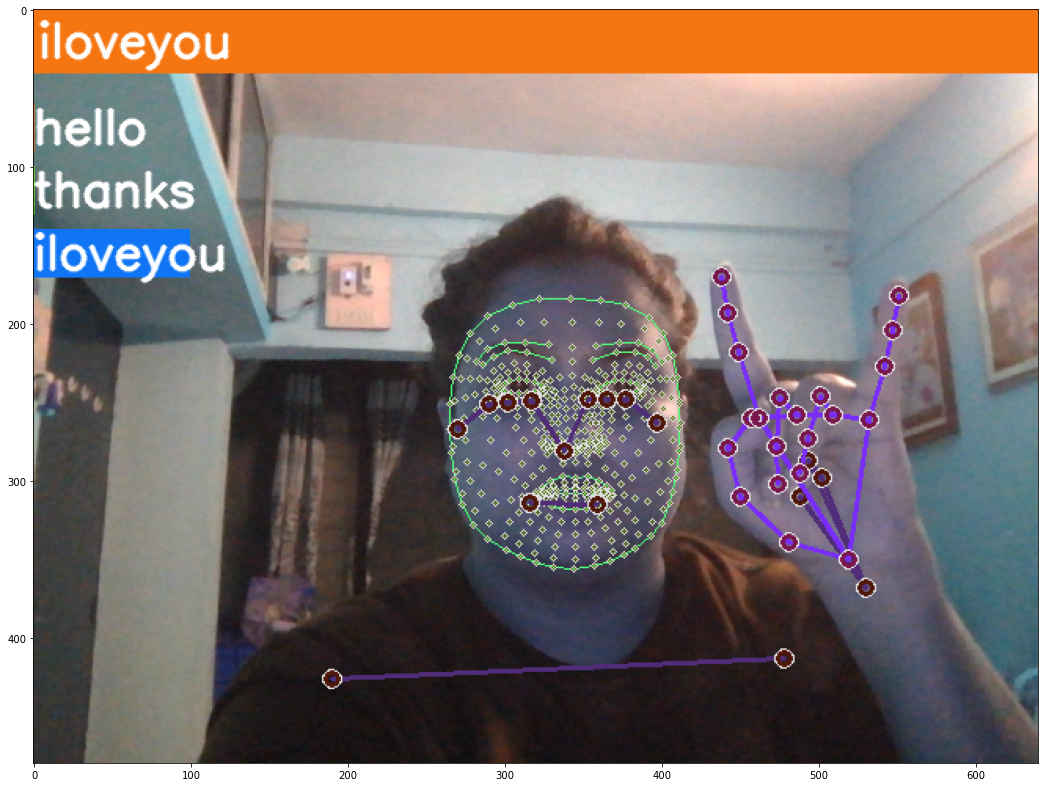

In [71]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [70]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('HAPPY HANDS', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti